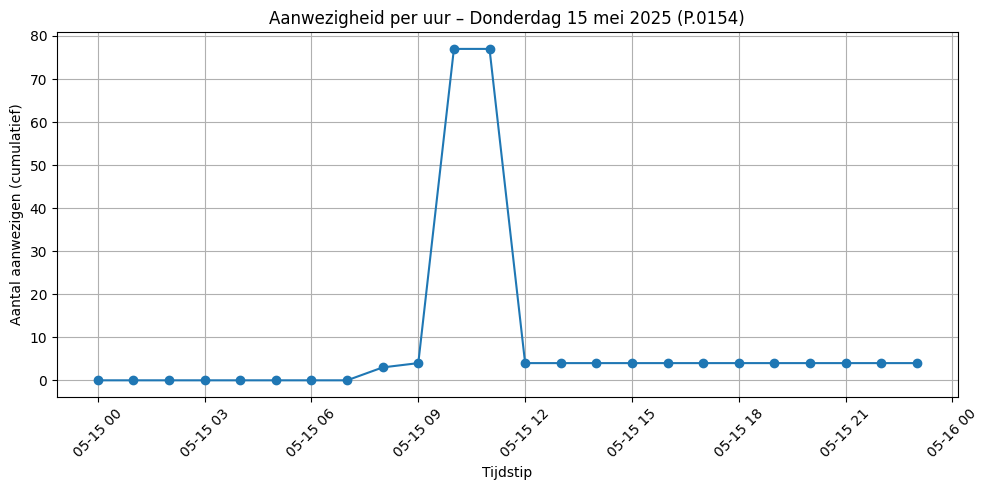

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Donderdagbestand inladen
bestand_donderdag = r"C:\BachelorproefFinaal\DATA\P.0154\P.0154 - Thu May 15 2025.xlsx"
df_donderdag = pd.read_excel(bestand_donderdag)

# Tijdstempels omzetten naar datetime
df_donderdag['Datetime'] = pd.to_datetime(df_donderdag['Datetime'])

# Per tijdstip A - B berekenen
df_donderdag['Netto'] = df_donderdag['0.154 ingang 1 Counter A'] - df_donderdag['0.154 ingang 1 Counter B']

# Groeperen per uur
df_donderdag['Hour'] = df_donderdag['Datetime'].dt.floor('h')
df_per_uur_donderdag = df_donderdag.groupby('Hour')['Netto'].sum().cumsum()

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(df_per_uur_donderdag.index, df_per_uur_donderdag.values, marker='o')
plt.title('Aanwezigheid per uur – Donderdag 15 mei 2025 (P.0154)')
plt.xlabel('Tijdstip')
plt.ylabel('Aantal aanwezigen (cumulatief)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

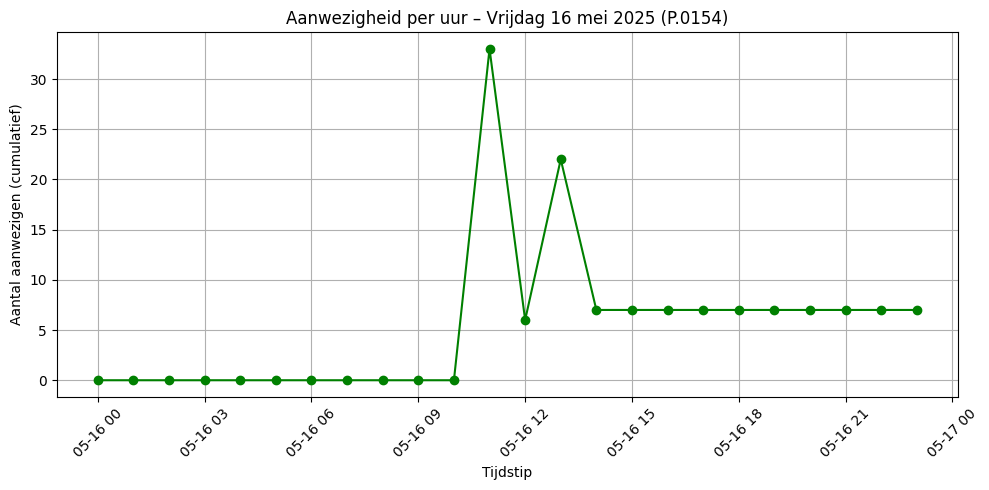

In [3]:
# Vrijdagbestand inladen
bestand_vrijdag = r"C:\BachelorproefFinaal\DATA\P.0154\P.0154 - Fri May 16 2025.xlsx"
df_vrijdag = pd.read_excel(bestand_vrijdag)

# Tijdstempels omzetten naar datetime
df_vrijdag['Datetime'] = pd.to_datetime(df_vrijdag['Datetime'])

# Kolomnamen aanpassen (vul hier exact de juiste in als ze anders zijn)
kolom_a = '0.154 ingang 1 Counter A'
kolom_b = '0.154 ingang 1 Counter B'

# Vervang lege cellen door 0
df_vrijdag[[kolom_a, kolom_b]] = df_vrijdag[[kolom_a, kolom_b]].fillna(0)

# Netto aanwezigen per uur: A - B
df_vrijdag['Netto'] = df_vrijdag[kolom_a] - df_vrijdag[kolom_b]

# Groepeer per uur en bereken cumulatief aanwezigen
df_vrijdag['Hour'] = df_vrijdag['Datetime'].dt.floor('h')
df_per_uur_vrijdag = df_vrijdag.groupby('Hour')['Netto'].sum().cumsum()

# Plotten
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_per_uur_vrijdag.index, df_per_uur_vrijdag.values, marker='o', color='green')
plt.title('Aanwezigheid per uur – Vrijdag 16 mei 2025 (P.0154)')
plt.xlabel('Tijdstip')
plt.ylabel('Aantal aanwezigen (cumulatief)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


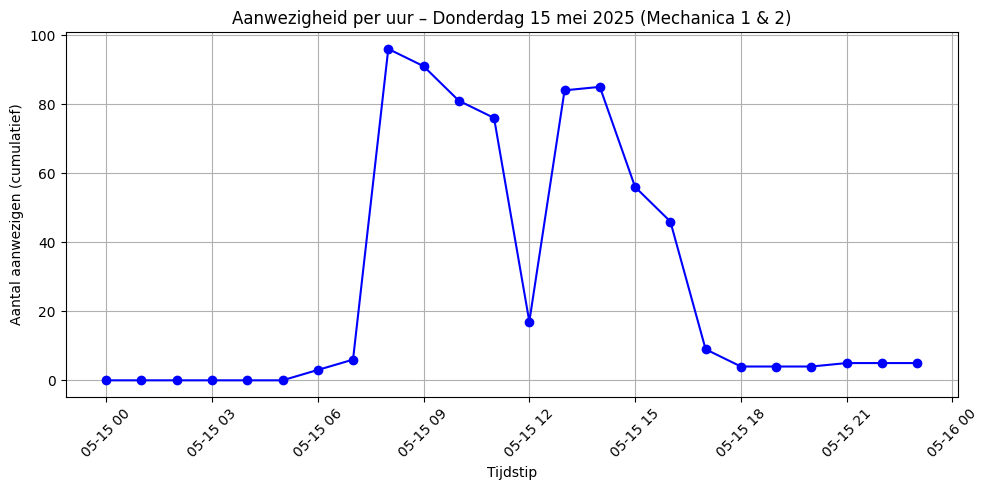

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Bestanden inladen voor donderdag
pad_donderdag_1 = r"C:\BachelorproefFinaal\DATA\mechanica\mechanica1 - Thu May 15 2025.xlsx"
pad_donderdag_2 = r"C:\BachelorproefFinaal\DATA\mechanica\mechanica2 - Thu May 15 2025.xlsx"

df1 = pd.read_excel(pad_donderdag_1)
df2 = pd.read_excel(pad_donderdag_2)

# Tijdstempels converteren
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df2['Datetime'] = pd.to_datetime(df2['Datetime'])

# Vervang lege waarden door 0
df1 = df1.fillna(0)
df2 = df2.fillna(0)

# Netto telling per doorgang
df1['Netto'] = df1['Mechanica doorgang 1 Counter A'] - df1['Mechanica doorgang 1 Counter B']
df2['Netto'] = df2['Ingang mechanica 2 Counter A'] - df2['Ingang mechanica 2 Counter B']

# Som van beide doorgangen
df1['Hour'] = df1['Datetime'].dt.floor('h')
df2['Hour'] = df2['Datetime'].dt.floor('h')

df_netto = df1[['Hour', 'Netto']].copy()
df_netto['Netto'] += df2['Netto']  # optellen per uur (zelfde indexstructuur)

# Cumulatief aanwezig per uur
df_aanwezig = df_netto.groupby('Hour')['Netto'].sum().cumsum()

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(df_aanwezig.index, df_aanwezig.values, marker='o', color='blue')
plt.title('Aanwezigheid per uur – Donderdag 15 mei 2025 (Mechanica 1 & 2)')
plt.xlabel('Tijdstip')
plt.ylabel('Aantal aanwezigen (cumulatief)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


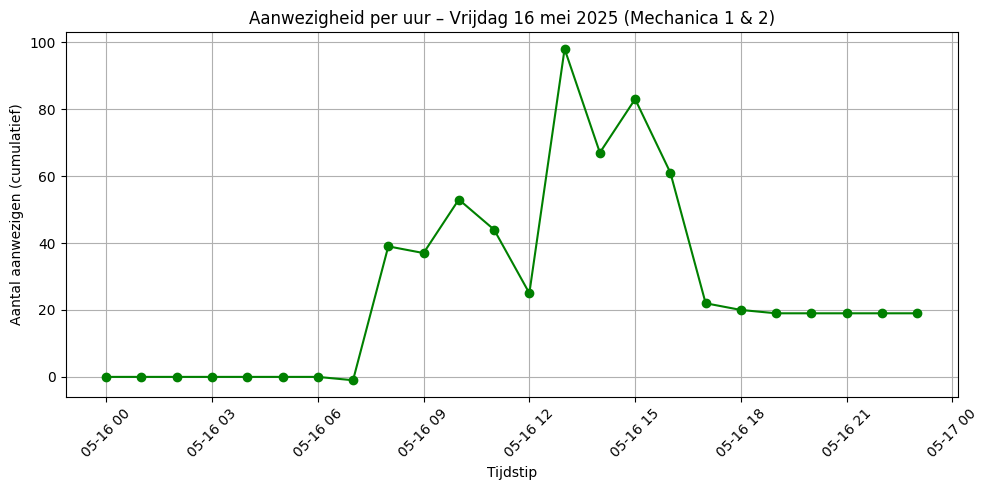

In [5]:
# Bestanden inladen voor vrijdag
pad_vrijdag_1 = r"C:\BachelorproefFinaal\DATA\mechanica\mechanica1 - Fri May 16 2025.xlsx"
pad_vrijdag_2 = r"C:\BachelorproefFinaal\DATA\mechanica\mechanica2 - Fri May 16 2025.xlsx"

df1_vr = pd.read_excel(pad_vrijdag_1)
df2_vr = pd.read_excel(pad_vrijdag_2)

# Tijdstempels converteren
df1_vr['Datetime'] = pd.to_datetime(df1_vr['Datetime'])
df2_vr['Datetime'] = pd.to_datetime(df2_vr['Datetime'])

# Vervang lege waarden door 0
df1_vr = df1_vr.fillna(0)
df2_vr = df2_vr.fillna(0)

# Netto telling per doorgang
df1_vr['Netto'] = df1_vr['Mechanica doorgang 1 Counter A'] - df1_vr['Mechanica doorgang 1 Counter B']
df2_vr['Netto'] = df2_vr['Ingang mechanica 2 Counter A'] - df2_vr['Ingang mechanica 2 Counter B']

# Uurkolom toevoegen
df1_vr['Hour'] = df1_vr['Datetime'].dt.floor('h')
df2_vr['Hour'] = df2_vr['Datetime'].dt.floor('h')

# Netto per uur optellen
df_netto_vr = df1_vr[['Hour', 'Netto']].copy()
df_netto_vr['Netto'] += df2_vr['Netto']  # optellen per uur

# Cumulatief aanwezig
df_aanwezig_vr = df_netto_vr.groupby('Hour')['Netto'].sum().cumsum()

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(df_aanwezig_vr.index, df_aanwezig_vr.values, marker='o', color='green')
plt.title('Aanwezigheid per uur – Vrijdag 16 mei 2025 (Mechanica 1 & 2)')
plt.xlabel('Tijdstip')
plt.ylabel('Aantal aanwezigen (cumulatief)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


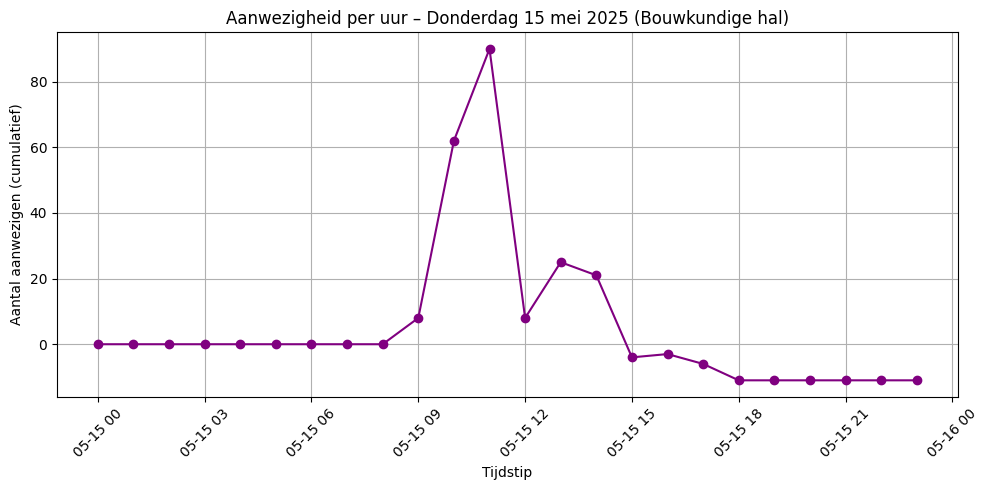

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

pad_hal_donderdag = r"C:\BachelorproefFinaal\DATA\bouwkundige hal\bouwkundige hal - Thu May 15 2025.xlsx"
df_hal_do = pd.read_excel(pad_hal_donderdag)

df_hal_do['Datetime'] = pd.to_datetime(df_hal_do['Datetime'])
df_hal_do = df_hal_do.fillna(0)

df_hal_do['Netto'] = df_hal_do['People Counter bouwkundige trap Counter A'] - df_hal_do['People Counter bouwkundige trap Counter B']
df_hal_do['Hour'] = df_hal_do['Datetime'].dt.floor('h')

df_aanwezig_hal_do = df_hal_do.groupby('Hour')['Netto'].sum().cumsum()

plt.figure(figsize=(10, 5))
plt.plot(df_aanwezig_hal_do.index, df_aanwezig_hal_do.values, marker='o', color='purple')
plt.title('Aanwezigheid per uur – Donderdag 15 mei 2025 (Bouwkundige hal)')
plt.xlabel('Tijdstip')
plt.ylabel('Aantal aanwezigen (cumulatief)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


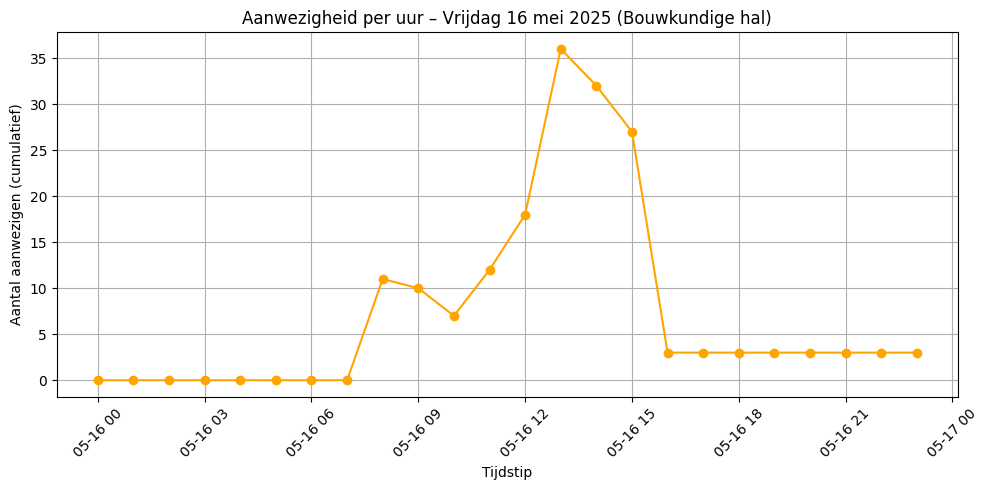

In [7]:
pad_hal_vrijdag = r"C:\BachelorproefFinaal\DATA\bouwkundige hal\bouwkundige hal - Fri May 16 2025.xlsx"
df_hal_vr = pd.read_excel(pad_hal_vrijdag)

df_hal_vr['Datetime'] = pd.to_datetime(df_hal_vr['Datetime'])
df_hal_vr = df_hal_vr.fillna(0)

df_hal_vr['Netto'] = df_hal_vr['People Counter bouwkundige trap Counter A'] - df_hal_vr['People Counter bouwkundige trap Counter B']
df_hal_vr['Hour'] = df_hal_vr['Datetime'].dt.floor('h')

df_aanwezig_hal_vr = df_hal_vr.groupby('Hour')['Netto'].sum().cumsum()

plt.figure(figsize=(10, 5))
plt.plot(df_aanwezig_hal_vr.index, df_aanwezig_hal_vr.values, marker='o', color='orange')
plt.title('Aanwezigheid per uur – Vrijdag 16 mei 2025 (Bouwkundige hal)')
plt.xlabel('Tijdstip')
plt.ylabel('Aantal aanwezigen (cumulatief)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


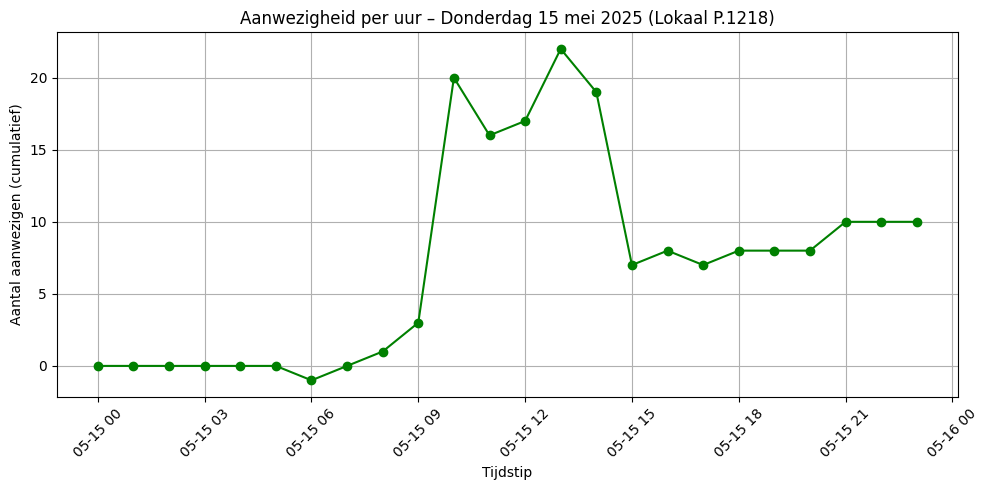

In [8]:
pad_lokaal_do = r"C:\BachelorproefFinaal\DATA\bouwkundige hal\P.1218 - Thu May 15 2025.xlsx"
df_lokaal_do = pd.read_excel(pad_lokaal_do)

df_lokaal_do['Datetime'] = pd.to_datetime(df_lokaal_do['Datetime'])
df_lokaal_do = df_lokaal_do.fillna(0)

df_lokaal_do['Netto'] = df_lokaal_do['Lokaal 1.218 Counter A'] - df_lokaal_do['Lokaal 1.218 Counter B']
df_lokaal_do['Hour'] = df_lokaal_do['Datetime'].dt.floor('h')

df_aanwezig_lokaal_do = df_lokaal_do.groupby('Hour')['Netto'].sum().cumsum()

plt.figure(figsize=(10, 5))
plt.plot(df_aanwezig_lokaal_do.index, df_aanwezig_lokaal_do.values, marker='o', color='green')
plt.title('Aanwezigheid per uur – Donderdag 15 mei 2025 (Lokaal P.1218)')
plt.xlabel('Tijdstip')
plt.ylabel('Aantal aanwezigen (cumulatief)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


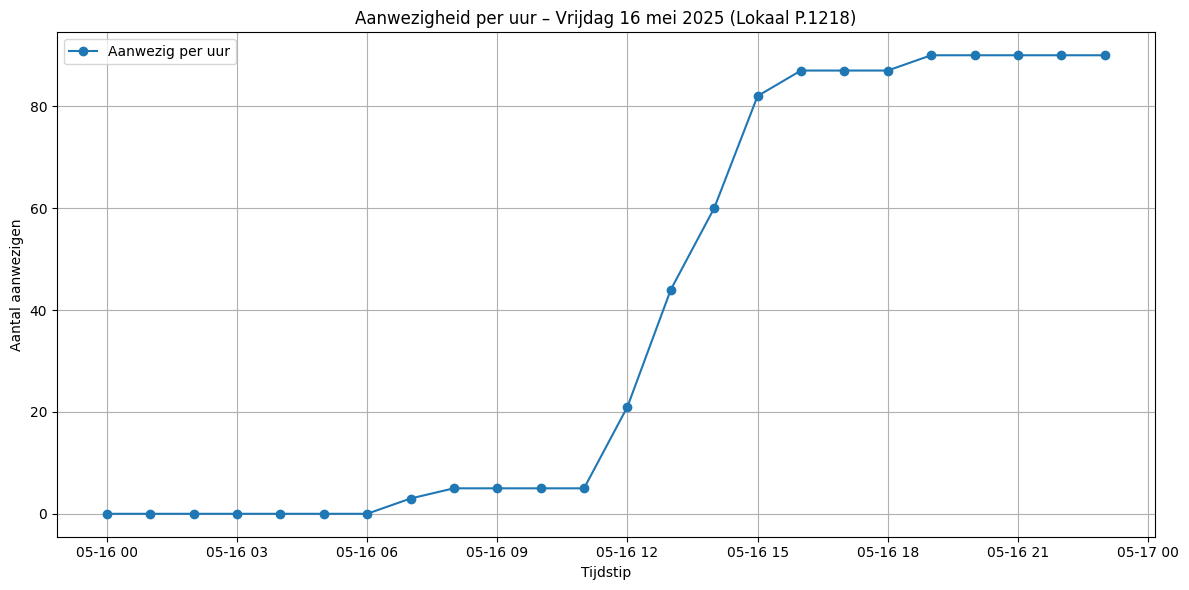

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Bestandspad
bestand_lokaal_vr = r"C:\BachelorproefFinaal\DATA\bouwkundige hal\P.1218 - Fri May 16 2025.xlsx"

# Inladen van de data
df = pd.read_excel(bestand_lokaal_vr)

# Kolommen hernoemen
df.columns = ['Datetime', 'A', 'B']
df['Datetime'] = pd.to_datetime(df['Datetime'])
df[['A', 'B']] = df[['A', 'B']].fillna(0)

# Voeg een kolom toe met alleen het uur (zonder minuten en seconden)
df['Uur'] = df['Datetime'].dt.floor('h')

# Groepeer per uur en tel aantal binnen (A) en buiten (B)
df_per_uur = df.groupby('Uur')[['A', 'B']].sum().reset_index()

# Bereken netto verschil per uur (binnen - buiten)
df_per_uur['Netto'] = df_per_uur['A'] - df_per_uur['B']

# Cumulatief aantal aanwezigen per uur
df_per_uur['Cumulatief'] = df_per_uur['Netto'].cumsum()

# Plot de cumulatieve aanwezigheid per uur
plt.figure(figsize=(12, 6))
plt.plot(df_per_uur['Uur'], df_per_uur['Cumulatief'], marker='o', label='Aanwezig per uur')
plt.title('Aanwezigheid per uur – Vrijdag 16 mei 2025 (Lokaal P.1218)')
plt.xlabel('Tijdstip')
plt.ylabel('Aantal aanwezigen')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
df_p0154_do = df_donderdag.copy()
df_p0154_do['Uur'] = df_p0154_do['Datetime'].dt.floor('h')

# Gebruik de juiste kolomnamen
kolom_in = '0.154 ingang 1 Counter A'
kolom_uit = '0.154 ingang 1 Counter B'

# Groeperen per uur en cumulatief aantal aanwezigen berekenen
df_per_uur = df_p0154_do.groupby('Uur')[[kolom_in, kolom_uit]].sum().reset_index()
df_per_uur['Aanwezig'] = (df_per_uur[kolom_in] - df_per_uur[kolom_uit]).cumsum()

# Alleen relevante kolommen tonen
df_per_uur = df_per_uur[['Uur', 'Aanwezig']]
display(df_per_uur)


,Uur,Aanwezig
0,2025-05-15 00:00:00,0.0
1,2025-05-15 01:00:00,0.0
2,2025-05-15 02:00:00,0.0
3,2025-05-15 03:00:00,0.0
4,2025-05-15 04:00:00,0.0
5,2025-05-15 05:00:00,0.0
6,2025-05-15 06:00:00,0.0
7,2025-05-15 07:00:00,0.0
8,2025-05-15 08:00:00,3.0
9,2025-05-15 09:00:00,4.0


In [16]:
df_p0154_vr = df_vrijdag.copy()
df_p0154_vr['Uur'] = df_p0154_vr['Datetime'].dt.floor('h')

# Gebruik dezelfde kolomnamen als bij donderdag
kolom_in = '0.154 ingang 1 Counter A'
kolom_uit = '0.154 ingang 1 Counter B'

# Groeperen per uur en cumulatief aantal aanwezigen berekenen
df_per_uur_vr = df_p0154_vr.groupby('Uur')[[kolom_in, kolom_uit]].sum().reset_index()
df_per_uur_vr['Aanwezig'] = (df_per_uur_vr[kolom_in] - df_per_uur_vr[kolom_uit]).cumsum()

# Alleen relevante kolommen tonen
df_per_uur_vr = df_per_uur_vr[['Uur', 'Aanwezig']]
display(df_per_uur_vr)


,Uur,Aanwezig
0,2025-05-16 00:00:00,0.0
1,2025-05-16 01:00:00,0.0
2,2025-05-16 02:00:00,0.0
3,2025-05-16 03:00:00,0.0
4,2025-05-16 04:00:00,0.0
5,2025-05-16 05:00:00,0.0
6,2025-05-16 06:00:00,0.0
7,2025-05-16 07:00:00,0.0
8,2025-05-16 08:00:00,0.0
9,2025-05-16 09:00:00,0.0


In [17]:
# Cumulatieve aanwezigheid per uur berekenen
df1['Uur'] = df1['Datetime'].dt.floor('h')
df2['Uur'] = df2['Datetime'].dt.floor('h')

# Bereken per uur het aantal binnen/uit voor beide doorgangen
kolommen_1 = ['Mechanica doorgang 1 Counter A', 'Mechanica doorgang 1 Counter B']
kolommen_2 = ['Ingang mechanica 2 Counter A', 'Ingang mechanica 2 Counter B']

df1_per_uur = df1.groupby('Uur')[kolommen_1].sum()
df2_per_uur = df2.groupby('Uur')[kolommen_2].sum()

# Tel A en B van beide doorgangen op
df_per_uur_mech_do = pd.DataFrame()
df_per_uur_mech_do['A'] = df1_per_uur[kolommen_1[0]] + df2_per_uur[kolommen_2[0]]
df_per_uur_mech_do['B'] = df1_per_uur[kolommen_1[1]] + df2_per_uur[kolommen_2[1]]

# Cumulatief aantal aanwezigen
df_per_uur_mech_do['Aanwezig'] = (df_per_uur_mech_do['A'] - df_per_uur_mech_do['B']).cumsum()
df_per_uur_mech_do = df_per_uur_mech_do[['Aanwezig']]
df_per_uur_mech_do.reset_index(inplace=True)

display(df_per_uur_mech_do)


,Uur,Aanwezig
0,2025-05-15 00:00:00,0.0
1,2025-05-15 01:00:00,0.0
2,2025-05-15 02:00:00,0.0
3,2025-05-15 03:00:00,0.0
4,2025-05-15 04:00:00,0.0
5,2025-05-15 05:00:00,0.0
6,2025-05-15 06:00:00,3.0
7,2025-05-15 07:00:00,6.0
8,2025-05-15 08:00:00,96.0
9,2025-05-15 09:00:00,91.0


In [18]:
df1_vr['Uur'] = df1_vr['Datetime'].dt.floor('h')
df2_vr['Uur'] = df2_vr['Datetime'].dt.floor('h')

# Kolomnamen
kolommen_1 = ['Mechanica doorgang 1 Counter A', 'Mechanica doorgang 1 Counter B']
kolommen_2 = ['Ingang mechanica 2 Counter A', 'Ingang mechanica 2 Counter B']

# Som per uur
df1_per_uur_vr = df1_vr.groupby('Uur')[kolommen_1].sum()
df2_per_uur_vr = df2_vr.groupby('Uur')[kolommen_2].sum()

# Samenvoegen van doorgangen
df_per_uur_mech_vr = pd.DataFrame()
df_per_uur_mech_vr['A'] = df1_per_uur_vr[kolommen_1[0]] + df2_per_uur_vr[kolommen_2[0]]
df_per_uur_mech_vr['B'] = df1_per_uur_vr[kolommen_1[1]] + df2_per_uur_vr[kolommen_2[1]]

# Aanwezigheid cumulatief berekenen
df_per_uur_mech_vr['Aanwezig'] = (df_per_uur_mech_vr['A'] - df_per_uur_mech_vr['B']).cumsum()
df_per_uur_mech_vr = df_per_uur_mech_vr[['Aanwezig']]
df_per_uur_mech_vr.reset_index(inplace=True)

display(df_per_uur_mech_vr)


,Uur,Aanwezig
0,2025-05-16 00:00:00,0.0
1,2025-05-16 01:00:00,0.0
2,2025-05-16 02:00:00,0.0
3,2025-05-16 03:00:00,0.0
4,2025-05-16 04:00:00,0.0
5,2025-05-16 05:00:00,0.0
6,2025-05-16 06:00:00,0.0
7,2025-05-16 07:00:00,-1.0
8,2025-05-16 08:00:00,39.0
9,2025-05-16 09:00:00,37.0


In [19]:
# Uurkolom toevoegen
df_hal_do['Uur'] = df_hal_do['Datetime'].dt.floor('h')

# Kolomnamen voor binnen en buiten
kolom_in = 'People Counter bouwkundige trap Counter A'
kolom_uit = 'People Counter bouwkundige trap Counter B'

# Som per uur
df_per_uur_hal_do = df_hal_do.groupby('Uur')[[kolom_in, kolom_uit]].sum()

# Cumulatief aantal aanwezigen
df_per_uur_hal_do['Aanwezig'] = (df_per_uur_hal_do[kolom_in] - df_per_uur_hal_do[kolom_uit]).cumsum()

# Alleen de nodige kolommen
df_per_uur_hal_do = df_per_uur_hal_do[['Aanwezig']]
df_per_uur_hal_do.reset_index(inplace=True)

display(df_per_uur_hal_do)


,Uur,Aanwezig
0,2025-05-15 00:00:00,0.0
1,2025-05-15 01:00:00,0.0
2,2025-05-15 02:00:00,0.0
3,2025-05-15 03:00:00,0.0
4,2025-05-15 04:00:00,0.0
5,2025-05-15 05:00:00,0.0
6,2025-05-15 06:00:00,0.0
7,2025-05-15 07:00:00,0.0
8,2025-05-15 08:00:00,0.0
9,2025-05-15 09:00:00,8.0


In [20]:
# Uurkolom toevoegen
df_hal_vr['Uur'] = df_hal_vr['Datetime'].dt.floor('h')

# Kolomnamen voor binnen en buiten
kolom_in = 'People Counter bouwkundige trap Counter A'
kolom_uit = 'People Counter bouwkundige trap Counter B'

# Som per uur
df_per_uur_hal_vr = df_hal_vr.groupby('Uur')[[kolom_in, kolom_uit]].sum()

# Cumulatief aantal aanwezigen
df_per_uur_hal_vr['Aanwezig'] = (df_per_uur_hal_vr[kolom_in] - df_per_uur_hal_vr[kolom_uit]).cumsum()

# Alleen de nodige kolommen
df_per_uur_hal_vr = df_per_uur_hal_vr[['Aanwezig']]
df_per_uur_hal_vr.reset_index(inplace=True)

display(df_per_uur_hal_vr)


,Uur,Aanwezig
0,2025-05-16 00:00:00,0.0
1,2025-05-16 01:00:00,0.0
2,2025-05-16 02:00:00,0.0
3,2025-05-16 03:00:00,0.0
4,2025-05-16 04:00:00,0.0
5,2025-05-16 05:00:00,0.0
6,2025-05-16 06:00:00,0.0
7,2025-05-16 07:00:00,0.0
8,2025-05-16 08:00:00,11.0
9,2025-05-16 09:00:00,10.0


In [21]:
# Uurkolom aanmaken
df_lokaal_do['Uur'] = df_lokaal_do['Datetime'].dt.floor('h')

# Kolomnamen voor binnen en buiten
kolom_in = 'Lokaal 1.218 Counter A'
kolom_uit = 'Lokaal 1.218 Counter B'

# Groeperen en optellen per uur
df_per_uur_lokaal_do = df_lokaal_do.groupby('Uur')[[kolom_in, kolom_uit]].sum()

# Aanwezigheid berekenen
df_per_uur_lokaal_do['Aanwezig'] = (df_per_uur_lokaal_do[kolom_in] - df_per_uur_lokaal_do[kolom_uit]).cumsum()

# Enkel relevante kolommen behouden
df_per_uur_lokaal_do = df_per_uur_lokaal_do[['Aanwezig']]
df_per_uur_lokaal_do.reset_index(inplace=True)

display(df_per_uur_lokaal_do)


,Uur,Aanwezig
0,2025-05-15 00:00:00,0.0
1,2025-05-15 01:00:00,0.0
2,2025-05-15 02:00:00,0.0
3,2025-05-15 03:00:00,0.0
4,2025-05-15 04:00:00,0.0
5,2025-05-15 05:00:00,0.0
6,2025-05-15 06:00:00,-1.0
7,2025-05-15 07:00:00,0.0
8,2025-05-15 08:00:00,1.0
9,2025-05-15 09:00:00,3.0


In [22]:
# Cumulatieve aanwezigheidsberekening
df['Aanwezig'] = (df['A'] - df['B']).cumsum()

# Selecteer de nodige kolommen
df_per_uur_lokaal_vr = df[['Uur', 'Aanwezig']].copy()

display(df_per_uur_lokaal_vr)


,Uur,Aanwezig
0,2025-05-16 00:00:00,0.0
1,2025-05-16 01:00:00,0.0
2,2025-05-16 02:00:00,0.0
3,2025-05-16 03:00:00,0.0
4,2025-05-16 04:00:00,0.0
5,2025-05-16 05:00:00,0.0
6,2025-05-16 06:00:00,0.0
7,2025-05-16 07:00:00,3.0
8,2025-05-16 08:00:00,5.0
9,2025-05-16 09:00:00,5.0


In [26]:
# Mechanica
df_mechanica_do = df_aanwezig.reset_index()
df_mechanica_do.columns = ['Uur', 'Mechanica']

# Bouwkundige hal
df_hal_do = df_aanwezig_hal_do.reset_index()
df_hal_do.columns = ['Uur', 'Bouwk. Hal']

# Lokaal P.1218
df_lokaal_do = df_aanwezig_lokaal_do.reset_index()
df_lokaal_do.columns = ['Uur', 'P.1218']

# P.0154
df_p0154_do = df_per_uur.rename(columns={'Uur': 'Uur', 'Aanwezig': 'P.0154'})

# Merge
tabel_donderdag = df_p0154_do.merge(df_mechanica_do, on='Uur', how='outer') \
                              .merge(df_hal_do, on='Uur', how='outer') \
                              .merge(df_lokaal_do, on='Uur', how='outer') \
                              .sort_values('Uur') \
                              .fillna(0)
tabel_donderdag  # Laat de tabel zien in notebook


,Uur,P.0154,Mechanica,Bouwk. Hal,P.1218
0,2025-05-15 00:00:00,0.0,0.0,0.0,0.0
1,2025-05-15 01:00:00,0.0,0.0,0.0,0.0
2,2025-05-15 02:00:00,0.0,0.0,0.0,0.0
3,2025-05-15 03:00:00,0.0,0.0,0.0,0.0
4,2025-05-15 04:00:00,0.0,0.0,0.0,0.0
5,2025-05-15 05:00:00,0.0,0.0,0.0,0.0
6,2025-05-15 06:00:00,0.0,3.0,0.0,-1.0
7,2025-05-15 07:00:00,0.0,6.0,0.0,0.0
8,2025-05-15 08:00:00,3.0,96.0,0.0,1.0
9,2025-05-15 09:00:00,4.0,91.0,8.0,3.0


In [29]:
# Mechanica
df_mechanica_vr = df_aanwezig_vr.reset_index()
df_mechanica_vr.columns = ['Uur', 'Mechanica']

# Bouwkundige hal
df_hal_vr = df_aanwezig_hal_vr.reset_index()
df_hal_vr.columns = ['Uur', 'Bouwk. Hal']

# Lokaal P.1218
df_lokaal_vr = df_per_uur_vr[['Uur', 'Aanwezig']].rename(columns={'Aanwezig': 'P.1218'})

# P.0154
df_p0154_vr = df_per_uur_vr.rename(columns={'Uur': 'Uur', 'Aanwezig': 'P.0154'})

# Merge
tabel_vrijdag = df_p0154_vr.merge(df_mechanica_vr, on='Uur', how='outer') \
                            .merge(df_hal_vr, on='Uur', how='outer') \
                            .merge(df_lokaal_vr, on='Uur', how='outer') \
                            .sort_values('Uur') \
                            .fillna(0)

tabel_vrijdag  # Laat de tabel zien in notebook


,Uur,P.0154,Mechanica,Bouwk. Hal,P.1218
0,2025-05-16 00:00:00,0.0,0.0,0.0,0.0
1,2025-05-16 01:00:00,0.0,0.0,0.0,0.0
2,2025-05-16 02:00:00,0.0,0.0,0.0,0.0
3,2025-05-16 03:00:00,0.0,0.0,0.0,0.0
4,2025-05-16 04:00:00,0.0,0.0,0.0,0.0
5,2025-05-16 05:00:00,0.0,0.0,0.0,0.0
6,2025-05-16 06:00:00,0.0,0.0,0.0,0.0
7,2025-05-16 07:00:00,0.0,-1.0,0.0,0.0
8,2025-05-16 08:00:00,0.0,39.0,11.0,0.0
9,2025-05-16 09:00:00,0.0,37.0,10.0,0.0
